In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [2]:
data = pd.read_csv("/kaggle/input/titanic/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
len(data)

891

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [10]:
# Split into X and y
X = data.drop("Survived", axis=1)
y = data["Survived"]

In [11]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [13]:
# Split data into train and validation sets
from sklearn.model_selection import train_test_split
np.random.seed(17)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [14]:
len(X_train), len(X_val), len(y_train), len(y_val)

(712, 179, 712, 179)

### Prepare our data

We need to:
1. handle missing values
2. make all data numerical

Only these features have missing:
1. age
2. cabin - to be removed
3. embarked
4. fare (in test data)

Our pipeline function will:
1. remove "PassengerId", "Name", "Ticket", "Cabin"
2. change "Sex" into numerical
3. change "Embarked" into numerical
4. fill embarked missing with mode?
5. fill age with mean?
6. fill fare with mean

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

def transform_data(data):
    # remove "PassengerId", "Name", "Ticket", "Cabin"
    data = data.drop("PassengerId", axis=1)
    data = data.drop("Name", axis=1)
    data = data.drop("Ticket", axis=1)
    data = data.drop("Cabin", axis=1)
    
    # fill na with pandas
    data["Age"].fillna(data["Age"].mean(), inplace=True)
    data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)
    data["Fare"].fillna(data["Fare"].mean(), inplace=True)
    
    # change "Sex" and "Embark" into numerical
    one_hot = OneHotEncoder()
    transformer = ColumnTransformer([("one_hot",
                                      one_hot,
                                      ["Sex", "Embarked"])],
                                    remainder="passthrough")
    data = transformer.fit_transform(data)
    
    return data

In [16]:
X_train_tf = transform_data(X_train)
X_train_tf
# note this converts to numpy array, and not pd

array([[ 0.    ,  1.    ,  0.    , ...,  0.    ,  0.    ,  9.    ],
       [ 0.    ,  1.    ,  0.    , ...,  0.    ,  0.    ,  7.75  ],
       [ 0.    ,  1.    ,  0.    , ...,  1.    ,  0.    , 26.    ],
       ...,
       [ 0.    ,  1.    ,  0.    , ...,  0.    ,  0.    ,  6.75  ],
       [ 1.    ,  0.    ,  0.    , ...,  1.    ,  0.    , 15.5   ],
       [ 0.    ,  1.    ,  0.    , ...,  0.    ,  0.    ,  7.8542]])

In [17]:
X_val_tf = transform_data(X_val)
X_val_tf

array([[  0.   ,   1.   ,   0.   , ...,   0.   ,   0.   ,   7.75 ],
       [  1.   ,   0.   ,   0.   , ...,   1.   ,   2.   , 151.55 ],
       [  0.   ,   1.   ,   0.   , ...,   1.   ,   0.   ,   7.925],
       ...,
       [  1.   ,   0.   ,   0.   , ...,   0.   ,   1.   ,  12.475],
       [  0.   ,   1.   ,   0.   , ...,   0.   ,   2.   ,  29.   ],
       [  0.   ,   1.   ,   1.   , ...,   0.   ,   0.   ,  26.55 ]])

In [18]:
pd.DataFrame(X_val_tf).isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

### Modeling
We're going to try 3 different machine learning models:

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train_tf, X_val_tf, y_train, y_val):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    """
    # Set random seed
    np.random.seed(17)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train_tf, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_val_tf, y_val)
    return model_scores

In [20]:
model_scores = fit_and_score(models=models,
                             X_train_tf=X_train_tf,
                             X_val_tf=X_val_tf,
                             y_train=y_train,
                             y_val=y_val)

model_scores

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Logistic Regression': 0.776536312849162,
 'KNN': 0.7039106145251397,
 'Random Forest': 0.7877094972067039}

### Further exploring model
on RandomForest, since it currently gives us the best result

In [21]:
# creating a evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_preds(y_true, y_preds):
    """
    perform evaluation comparison on y_true labels vs y_preds labels
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                          "precision": round(precision, 2),
                          "recall": round(recall, 2),
                          "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    return metric_dict


In [22]:
np.random.seed(17)
clf = RandomForestClassifier()
clf.fit(X_train_tf, y_train)
y_preds = clf.predict(X_val_tf)  # prediction using X_val_tf

# evaluate using our function on validation set
baseline_metrics = evaluate_preds(y_val, y_preds)
baseline_metrics


Acc: 78.77%
Precision: 0.77
Recall: 0.68
F1 score: 0.72


{'accuracy': 0.79, 'precision': 0.77, 'recall': 0.68, 'f1': 0.72}

In [23]:
# tuning hyperparameters by RandomSearchCV

from sklearn.model_selection import RandomizedSearchCV
grid = {"n_estimators": [10,100,200,500,1000,1200],
        "max_depth": [None,5,10,20,30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2,4,6],
        "min_samples_leaf": [1,2,4]}

np.random.seed(17)

clf = RandomForestClassifier()
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,  # what we defined above
                            n_iter=10, # number of combinations to try
                            cv=5,   # number of cross-validation split
                            verbose=2)
rs_clf.fit(X_train_tf, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   2.6s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   2.6s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   2.6s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   2.6s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   2.6s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_sa

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.1min finished


In [24]:
rs_clf.best_params_

{'n_estimators': 1000,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10}

In [25]:
rs_y_preds = rs_clf.predict(X_val_tf)

# evaluate predictions
rs_metrics = evaluate_preds(y_val, rs_y_preds)


Acc: 79.89%
Precision: 0.78
Recall: 0.70
F1 score: 0.74


In [26]:
# tuning hyperparameters by GridSearchCV
from sklearn.model_selection import GridSearchCV

grid_2 = {'n_estimators': [500, 1000, 2000],
         'max_depth': [None, 10],
         'max_features': ['sqrt'],
         'min_samples_split': [4, 6],
         'min_samples_leaf': [1, 2]}

np.random.seed(17)

clf = RandomForestClassifier()

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                            param_grid=grid_2,
                            cv=5,
                            verbose=2)

# Fit the GSCV version of clf
gs_clf.fit(X_train_tf, y_train);


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   1.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   1.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   1.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   1.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   1.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000, total=   2.7s
[CV] max_depth=None, max_feature

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  6.1min finished


In [27]:
gs_clf.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 1000}

In [28]:
gs_y_preds = gs_clf.predict(X_val_tf)
gs_y_preds

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0])

In [29]:
gs_metrics = evaluate_preds(y_val, gs_y_preds)

Acc: 79.33%
Precision: 0.78
Recall: 0.68
F1 score: 0.73


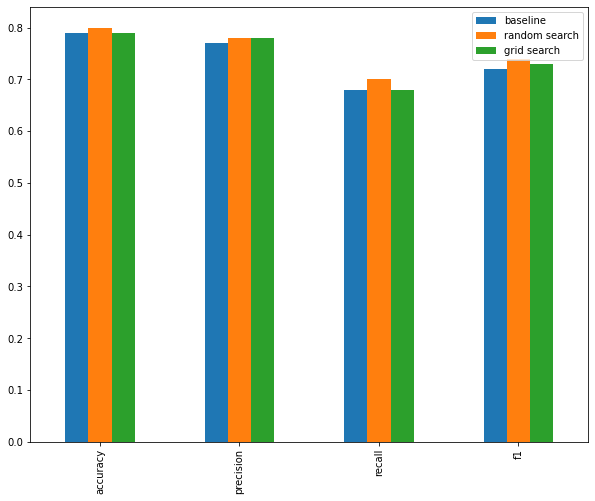

In [30]:
# Lets compare our different model metrics

compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})
compare_metrics.plot.bar(figsize=(10,8))


Seems like RandomSearchCV yields the best result for our model

Testing
1. transform test data
2. run test
3. export into desired test result

In [31]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [32]:
test_data_tf = transform_data(test_data)
test_data_tf 

array([[ 0.    ,  1.    ,  0.    , ...,  0.    ,  0.    ,  7.8292],
       [ 1.    ,  0.    ,  0.    , ...,  1.    ,  0.    ,  7.    ],
       [ 0.    ,  1.    ,  0.    , ...,  0.    ,  0.    ,  9.6875],
       ...,
       [ 0.    ,  1.    ,  0.    , ...,  0.    ,  0.    ,  7.25  ],
       [ 0.    ,  1.    ,  0.    , ...,  0.    ,  0.    ,  8.05  ],
       [ 0.    ,  1.    ,  1.    , ...,  1.    ,  1.    , 22.3583]])

In [33]:
pd.DataFrame(test_data_tf ).isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

In [34]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [35]:
test_preds = gs_clf.predict(test_data_tf)
pd.DataFrame(test_preds)

,0
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [36]:
submission = pd.DataFrame({"PassengerId": test_data["PassengerId"], 
                          "Survived": test_preds})

In [37]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [38]:
len(submission)

418

In [39]:
len(test_data)

418

In [40]:
submission.to_csv("submission.csv", index=False)